In [3]:
#import packages
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime as dt

In [5]:
daily_activity = pd.read_csv("Downloads/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")

In [7]:
#preview first 15 rows with all columns
daily_activity.head(15)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [9]:
# obtain the number of missing data points per column
missing_values_count = daily_activity.isnull().sum()

In [11]:
# look at the number of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [13]:
# show the basic information of dataset
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [15]:
# count the distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))

print("# of unique Id: " + str(unique_id))

# of unique Id: 35


In [17]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

daily_activity.info()

daily_activity["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   ActivityDate              457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance             457 non-null    float64       
 4   TrackerDistance           457 non-null    float64       
 5   LoggedActivitiesDistance  457 non-null    float64       
 6   VeryActiveDistance        457 non-null    float64       
 7   ModeratelyActiveDistance  457 non-null    float64       
 8   LightActiveDistance       457 non-null    float64       
 9   SedentaryActiveDistance   457 non-null    float64       
 10  VeryActiveMinutes         457 non-null    int64         
 11  FairlyActiveMinutes       457 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-03-25
1   2016-03-26
2   2016-03-27
3   2016-03-28
4   2016-03-29
Name: ActivityDate, dtype: datetime64[ns]

In [19]:
#r create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExcerciseMinutes', 'TotalExcerciseHours', 'Calories']

df_activity = daily_activity.reindex(columns=new_cols)

df_activity.head(10)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExcerciseMinutes,TotalExcerciseHours,Calories
0,1503960366,2016-03-25,NaN,11004,7.11,7.11,NaN,4.07,0.0,33,205,804,NaN,NaN,1819
1,1503960366,2016-03-26,NaN,17609,11.55,11.55,NaN,3.91,0.0,89,274,588,NaN,NaN,2154
2,1503960366,2016-03-27,NaN,12736,8.53,8.53,NaN,3.71,0.0,56,268,605,NaN,NaN,1944
3,1503960366,2016-03-28,NaN,13231,8.93,8.93,NaN,4.95,0.0,39,224,1080,NaN,NaN,1932
4,1503960366,2016-03-29,NaN,12041,7.85,7.85,NaN,4.61,0.0,28,243,763,NaN,NaN,1886
5,1503960366,2016-03-30,NaN,10970,7.16,7.16,NaN,4.29,0.0,30,223,1174,NaN,NaN,1820
6,1503960366,2016-03-31,NaN,12256,7.86,7.86,NaN,5.04,0.0,33,239,820,NaN,NaN,1889
7,1503960366,2016-04-01,NaN,12262,7.87,7.87,NaN,3.64,0.0,47,200,866,NaN,NaN,1868
8,1503960366,2016-04-02,NaN,11248,7.25,7.25,NaN,3.74,0.0,40,244,636,NaN,NaN,1843
9,1503960366,2016-04-03,NaN,10016,6.37,6.37,NaN,4.18,0.0,15,314,655,NaN,NaN,1850


In [21]:
# create new column "day_of_the_week" to represent day of the week 
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name()

df_activity["DayOfTheWeek"].head(10)

0       Friday
1     Saturday
2       Sunday
3       Monday
4      Tuesday
5    Wednesday
6     Thursday
7       Friday
8     Saturday
9       Sunday
Name: DayOfTheWeek, dtype: object

In [23]:
# rename the columns
df_activity.rename(columns = {"Id":"id", "ActivityDate": "date", "DayOfTheWeek": "day_of_the_week", "TotalSteps": "total_steps", "TotalDistance": "total_dist", "TrackerDistance": "track_dist", "LoggedActivityDistance": "logged_dist", "VeryActiveDistance": "very_Active_dist", "ModeratelyActiveDistance": "moderate_active_dist", "LightActiveDistance": "light_active_dist", "SedentaryActiveDistance": "sedentary_active_dist", "VeryActiveMinutes": "very_Active_mins", "FairlyActiveMinutes" : "fairly_active_mins", "LightlyActiveMinutes": "lightly_active_mins", "SedentaryMinutes": "sedentary_mins", "TotalExcerciseMinutes": "total_mins", "TotalExcerciseHours": "total_hours", "Calories": "calories"}, inplace =True)

print(df_activity.columns.values)
df_activity.head(10)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'LoggedActiveDistance' 'light_active_dist' 'sedentary_active_dist'
 'very_Active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,LoggedActiveDistance,light_active_dist,sedentary_active_dist,very_Active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-03-25,Friday,11004,7.11,7.11,NaN,4.07,0.0,33,205,804,NaN,NaN,1819
1,1503960366,2016-03-26,Saturday,17609,11.55,11.55,NaN,3.91,0.0,89,274,588,NaN,NaN,2154
2,1503960366,2016-03-27,Sunday,12736,8.53,8.53,NaN,3.71,0.0,56,268,605,NaN,NaN,1944
3,1503960366,2016-03-28,Monday,13231,8.93,8.93,NaN,4.95,0.0,39,224,1080,NaN,NaN,1932
4,1503960366,2016-03-29,Tuesday,12041,7.85,7.85,NaN,4.61,0.0,28,243,763,NaN,NaN,1886
5,1503960366,2016-03-30,Wednesday,10970,7.16,7.16,NaN,4.29,0.0,30,223,1174,NaN,NaN,1820
6,1503960366,2016-03-31,Thursday,12256,7.86,7.86,NaN,5.04,0.0,33,239,820,NaN,NaN,1889
7,1503960366,2016-04-01,Friday,12262,7.87,7.87,NaN,3.64,0.0,47,200,866,NaN,NaN,1868
8,1503960366,2016-04-02,Saturday,11248,7.25,7.25,NaN,3.74,0.0,40,244,636,NaN,NaN,1843
9,1503960366,2016-04-03,Sunday,10016,6.37,6.37,NaN,4.18,0.0,15,314,655,NaN,NaN,1850


In [43]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_Active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

0    1042
1     951
2     929
3    1343
4    1034
Name: total_mins, dtype: int64

In [47]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] =  round(df_activity["total_mins"] / 60)

df_activity["total_hours"].head(10)

0    17.0
1    16.0
2    15.0
3    22.0
4    17.0
5    24.0
6    18.0
7    19.0
8    15.0
9    16.0
Name: total_hours, dtype: float64

In [49]:
# pull general statistics
df_activity.describe()

,id,date,total_steps,total_dist,track_dist,LoggedActiveDistance,light_active_dist,sedentary_active_dist,very_Active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,4.570000e+02,457,457.000000,457.000000,457.000000,0.0,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,2016-04-04 04:40:26.258205696,6546.562363,4.663523,4.609847,NaN,2.890197,0.001904,16.623632,170.070022,995.282276,1181.975930,19.724289,2189.452954
min,1.503960e+09,2016-03-12 00:00:00,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,32.000000,41.000000,1.000000,0.000000
25%,2.347168e+09,2016-04-02 00:00:00,1988.000000,1.410000,1.280000,NaN,0.870000,0.000000,0.000000,64.000000,728.000000,963.000000,16.000000,1776.000000
50%,4.057193e+09,2016-04-05 00:00:00,5986.000000,4.090000,4.090000,NaN,2.930000,0.000000,0.000000,181.000000,1057.000000,1384.000000,23.000000,2062.000000
75%,6.391747e+09,2016-04-08 00:00:00,10198.000000,7.160000,7.110000,NaN,4.460000,0.000000,25.000000,257.000000,1285.000000,1440.000000,24.000000,2667.000000
max,8.877689e+09,2016-04-12 00:00:00,28497.000000,27.530001,27.530001,NaN,12.510000,0.100000,202.000000,720.000000,1440.000000,1440.000000,24.000000,4562.000000
std,2.293781e+09,NaN,5398.493064,4.082072,4.068540,NaN,2.237523,0.008487,28.919704,122.205372,337.021404,308.041047,5.172731,815.484523


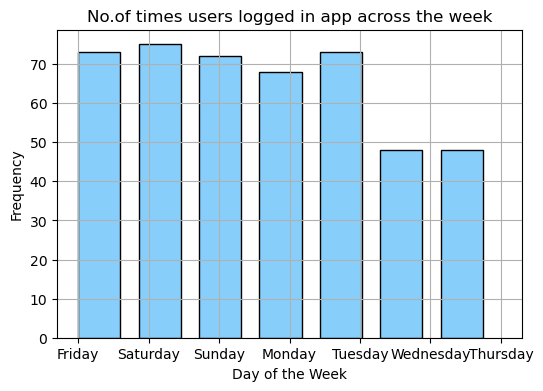

In [55]:
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4))
plt.hist(df_activity.day_of_the_week, bins = 7, 
         width = 0.6, color = "lightskyblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.title("No.of times users logged in app across the week")
plt.grid(True)
plt.show()

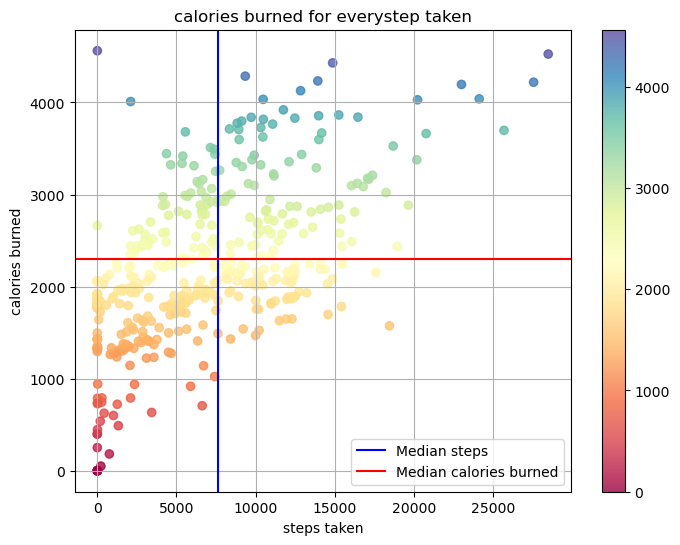

In [61]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_activity.total_steps, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories,
            cmap = "Spectral")

# add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue",label ="Median steps")
plt.axhline(median_calories, color= "Red", label = "Median calories burned")
plt.xlabel("steps taken")
plt.ylabel("calories burned")
plt.title("calories burned for everystep taken")
plt.grid(True)
plt.legend()
plt.show()

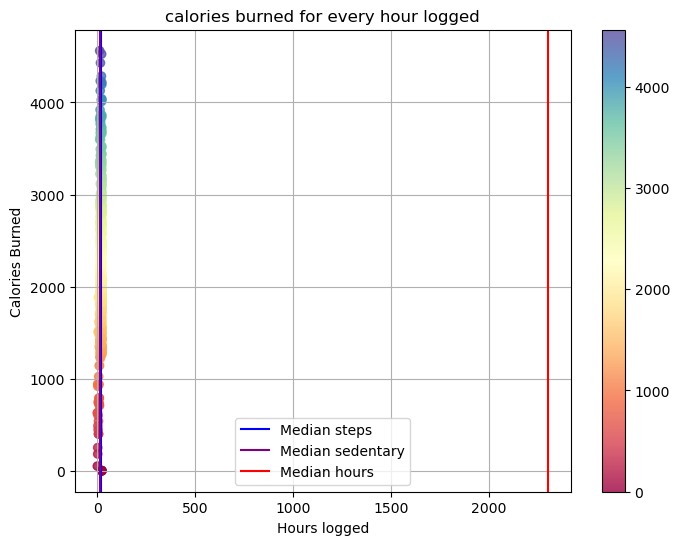

In [65]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_activity.total_hours, df_activity.calories,
            alpha =0.8, c = df_activity.calories, 
            cmap = "Spectral")

# adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation =  "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axvline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories Burned")
plt.title("calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

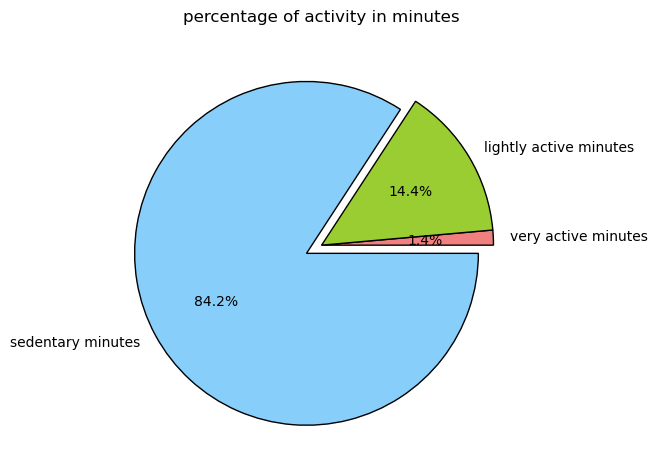

In [79]:
# calculating total of individual minutes column
very_active_mins = df_activity["very_Active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, lightly_active_mins, sedentary_mins]
labels =  ["very active minutes", "lightly active minutes", "sedentary minutes"]
colours  = ["lightcoral", "yellowgreen", "lightskyblue"]
explode = [0,0,0.1]
plt.style.use("default")
plt.pie(slices,labels = labels, 
        colors = colours, wedgeprops = {"edgecolor":"black"},
        explode = explode, autopct = "%1.1f%%")
plt.title("percentage of activity in minutes")
plt.tight_layout()
plt.show()